In [1]:
import plotly.offline as pyo
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
share = pd.read_csv('Downloads/ca_c_f_d.csv',parse_dates=True)
share.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,2015-01-02,6309.0,6309.0,6309.0,6309.0
1,2015-01-05,6216.0,6216.0,6216.0,6216.0
2,2015-01-06,6191.0,6191.0,6191.0,6191.0
3,2015-01-07,6170.0,6170.0,6170.0,6170.0
4,2015-01-08,6230.5,6230.5,6230.5,6230.5


In [3]:
copper = pd.read_csv('Downloads/kgh_d.csv',parse_dates=True)
copper.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2015-01-02,102.45,102.83,101.97,102.40,309987
1,2015-01-05,102.16,102.88,99.91,100.09,479228
2,2015-01-07,100.53,105.45,99.67,104.89,966372
3,2015-01-08,105.35,107.15,105.35,107.11,711805
4,2015-01-09,107.15,107.15,103.87,104.33,563221


### Stwórz dwa osobne wykresy liniowe (jeden pod drugim) – jeden niech przedstawia ceny zamknięcia KGHM, drugi niech przedstawia ceny miedzi (na podstawie kolumn "Zamknięcie").

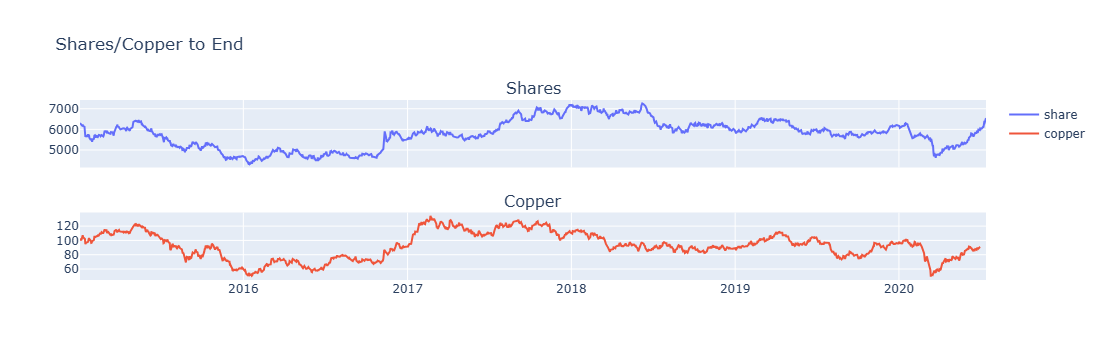

In [10]:
fig = make_subplots(rows=2, cols =1, subplot_titles = ['Shares', 'Copper'], shared_xaxes = True)
fig.add_trace(go.Scatter(x=share['Data'],y=share['Zamkniecie'], mode='lines',name='share'), 1,1)
fig.add_trace(go.Scatter(x=copper['Data'],y=copper['Zamkniecie'], mode='lines',name='copper'), 2,1)
fig.update_layout(title='Shares/Copper to End')
iplot(fig)

### Jako trzeci element wykresu dodaj tabelę zestawiającą ceny zamknięcia KGHM oraz miedzi w kolejnych dniach (ponownie na podstawie kolumny "Zamknięcie").

In [78]:
table = pd.merge(share[['Data','Zamkniecie']],copper[['Data','Zamkniecie']], on = 'Data', how = 'outer')
table.columns = ['Data', 'Shares', 'Copper']
table = table.dropna(axis=0, thresh = 3)
table

,Data,Shares,Copper
0,2015-01-02,6309.0,102.40
1,2015-01-05,6216.0,100.09
3,2015-01-07,6170.0,104.89
4,2015-01-08,6230.5,107.11
5,2015-01-09,6151.0,104.33
...,...,...,...
1404,2020-06-24,5871.0,88.56
1405,2020-06-25,5880.5,89.86
1406,2020-06-26,5985.5,88.68
1407,2020-06-29,5957.0,90.46


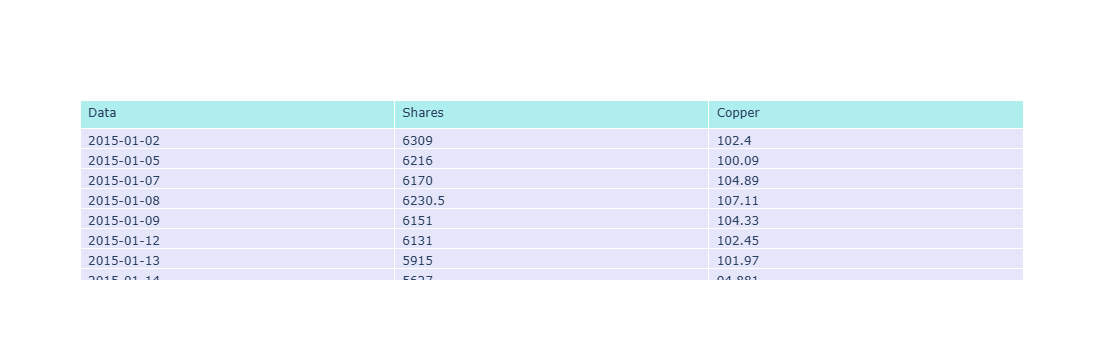

In [80]:
# Tworzenie tabeli w Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=['Data', 'Shares', 'Copper'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[
        table['Data'],
        table['Shares'],
        table['Copper']
    ],
    fill_color='lavender',
    align='left'))
])

iplot(fig)